# Overview of this notebook:
1. **Library Imports**
2. **Dataset Loading**
3. **Data Visualization:** 
    - Histogram of Landmark ID Counts
    - Plot of Most Frequent Landmark IDs
    - Plot of Least Frequent Landmark IDs
    - Landmark ID Distribution
    - Landmark ID Density Plot
    - Combined Distribution and Density Plot of Landmark IDs
    - Training Set: Line Plot of Images per Class
    - Training Set: Scatter Plot of Images per Class
    - Visualization of Outliers, Min/Max, and Quantiles of Landmark Counts
    - Probability Plot
4. **Display Random Images**

In [43]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import glob

warnings.filterwarnings('ignore')

In [44]:
# We will use the training dataset
train = pd.read_csv("train.csv")
train.head()

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7


In [45]:
# Check for Duplicates
train.duplicated().sum()

0

In [46]:
print("Training data size",train.shape)
submission = pd.read_csv("sample_submission.csv")
submission.head()

Training data size (1580470, 2)


,id,landmarks
0,00084cdf8f600d00,137790 0.1
1,000b15b043eb8cf0,137790 0.1
2,0011a52f9b948fd2,137790 0.1
3,00141b8a5a729084,137790 0.1
4,0018aa4b92532b77,137790 0.1


<Axes: >

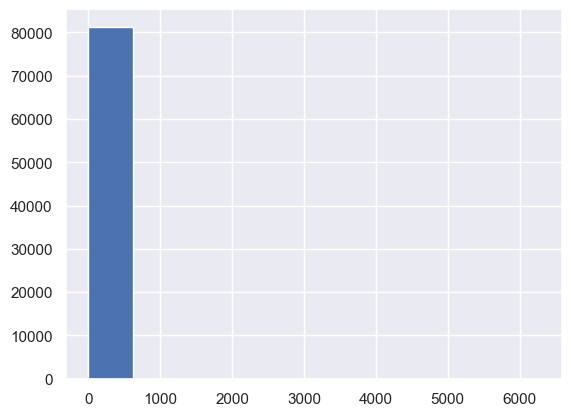

In [47]:
train['landmark_id'].value_counts().hist()

In [48]:
# Missing values in training dataset
total = train.isnull().sum().sort_values(ascending = False)
percentage = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)
missing_train_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()

,Total,Percent
id,0,0.0
landmark_id,0,0.0


In [49]:
# Occurance of landmark_id in decreasing order(Top categories)
temporary = pd.DataFrame(train.landmark_id.value_counts().head(8))
temporary.reset_index(inplace=True)
temporary.columns = ['landmark_id','count']
temporary

,landmark_id,count
0,138982,6272
1,126637,2231
2,20409,1758
3,83144,1741
4,113209,1135
5,177870,1088
6,194914,1073
7,149980,971


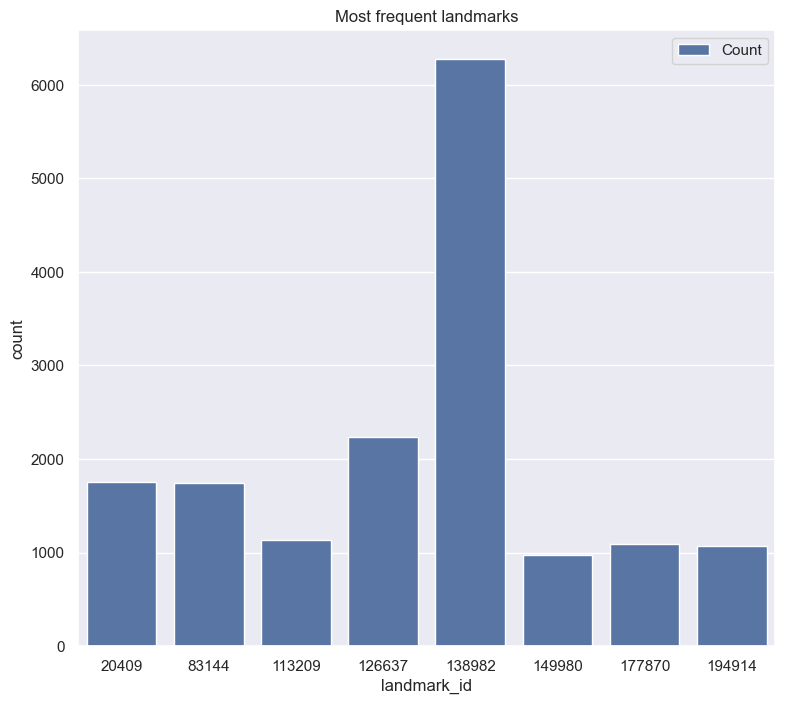

In [50]:
# Plot the most frequent landmark_ids
plt.figure(figsize = (9, 8))
plt.title('Most frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=temporary,
            label="Count")
plt.show()

In [51]:
# Occurance of landmark_id in ascending order
temporary = pd.DataFrame(train.landmark_id.value_counts().tail(8))
temporary.reset_index(inplace=True)
temporary.columns = ['landmark_id','count']
temporary

,landmark_id,count
0,133657,2
1,84711,2
2,84686,2
3,84677,2
4,36989,2
5,133688,2
6,17316,2
7,111405,2


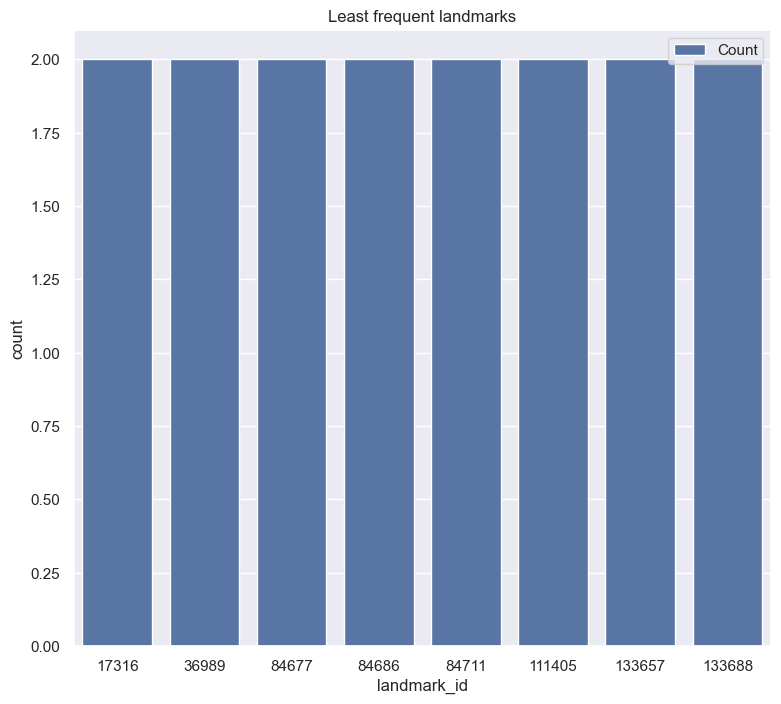

In [52]:
# Plot the least frequent landmark_ids
plt.figure(figsize = (9, 8))
plt.title('Least frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=temporary,
            label="Count")
plt.show()

In [53]:
train.nunique()

id             1580470
landmark_id      81313
dtype: int64

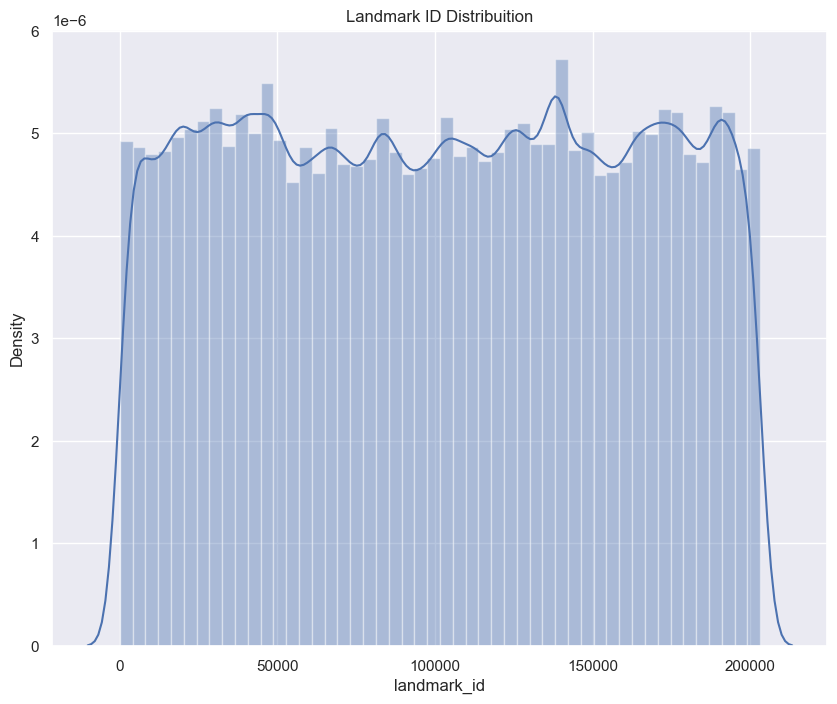

In [54]:
# Landmark ID distribution
plt.figure(figsize = (10, 8))
plt.title('Landmark ID Distribuition')
sns.distplot(train['landmark_id'])

plt.show()

In [55]:
print("Number of classes under 20 occurences",(train['landmark_id'].value_counts() <= 20).sum(),'out of total number of categories',len(train['landmark_id'].unique()))

Number of classes under 20 occurences 61620 out of total number of categories 81313


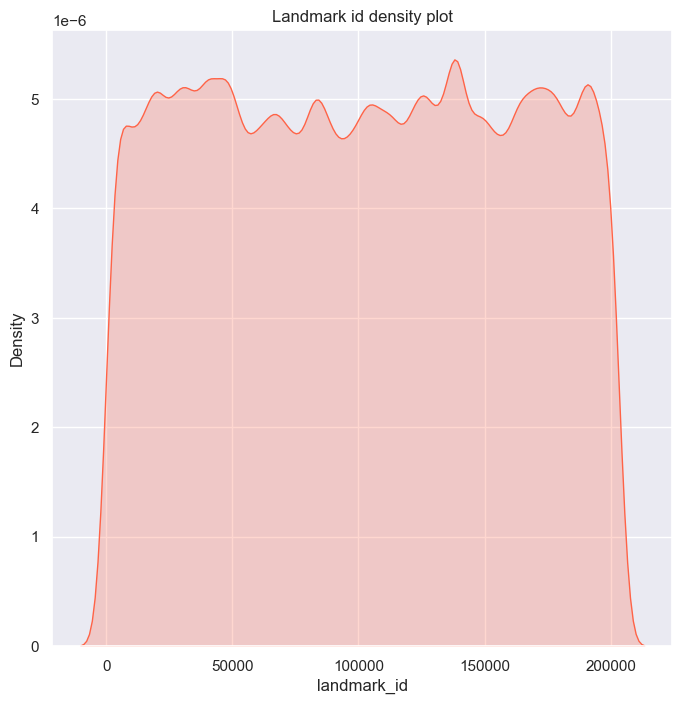

In [56]:
# Landmark Id Density Plot
plt.figure(figsize = (8, 8))
plt.title('Landmark id density plot')
sns.kdeplot(train['landmark_id'], color="tomato", shade=True)
plt.show()

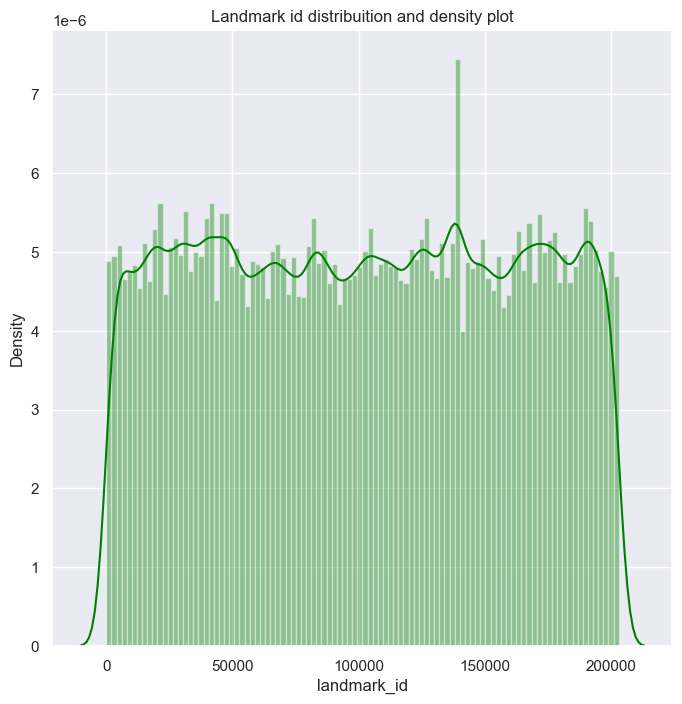

In [57]:
# Landmark id distribuition and density plot
plt.figure(figsize = (8, 8))
plt.title('Landmark id distribuition and density plot')
sns.distplot(train['landmark_id'],color='green', kde=True,bins=100)
plt.show()

[Text(0.5, 0, 'Landmarks'), Text(0, 0.5, 'Number of images')]

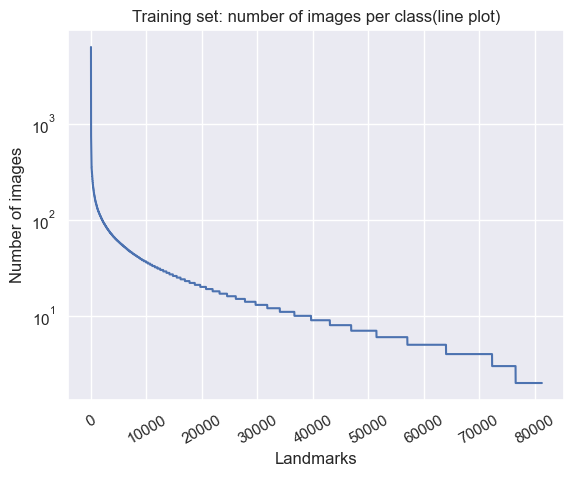

In [58]:
sns.set()
plt.title('Training set: number of images per class(line plot)')
sns.set_color_codes("pastel")
landmarks_fold = pd.DataFrame(train['landmark_id'].value_counts())
landmarks_fold.reset_index(inplace=True)
landmarks_fold.columns = ['landmark_id','count']
axis = landmarks_fold['count'].plot(logy=True, grid=True)
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)
axis.set(xlabel="Landmarks", ylabel="Number of images")

[Text(0.5, 0, 'Landmarks'), Text(0, 0.5, 'Number of images')]

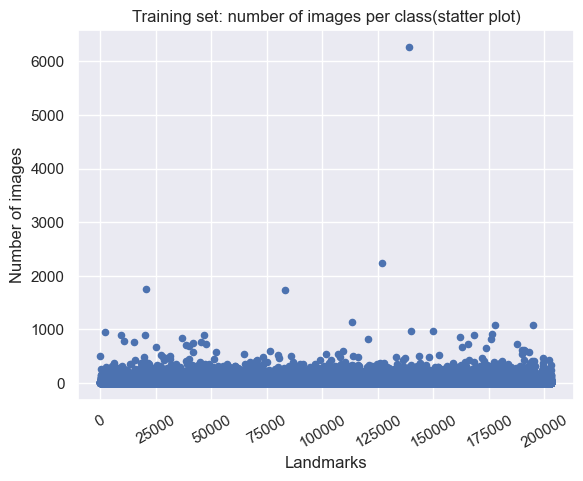

In [59]:
# Training set: number of images per class(statter plot)
sns.set()
landmarks_fold_sorted = pd.DataFrame(train['landmark_id'].value_counts())
landmarks_fold_sorted.reset_index(inplace=True)
landmarks_fold_sorted.columns = ['landmark_id','count']
landmarks_fold_sorted = landmarks_fold_sorted.sort_values('landmark_id')
axis = landmarks_fold_sorted.plot.scatter(\
     x='landmark_id',y='count',
     title='Training set: number of images per class(statter plot)')
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)
axis.set(xlabel="Landmarks", ylabel="Number of images")

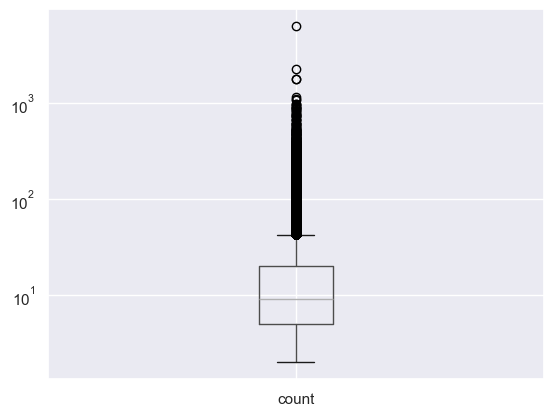

In [60]:
# Visualize outliers, min/max or quantiles of the landmarks count
sns.set()
axis = landmarks_fold_sorted.boxplot(column='count')
axis.set_yscale('log')

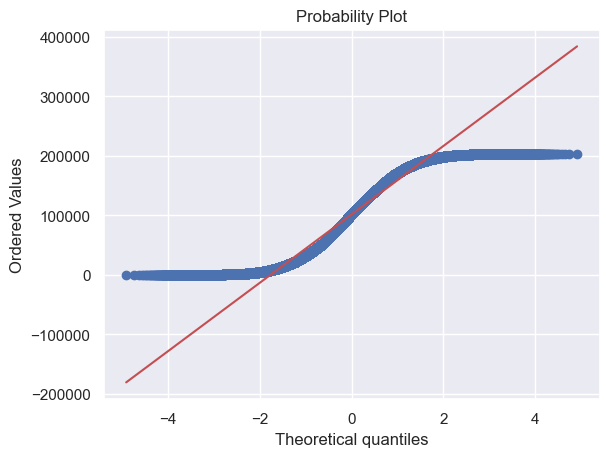

In [61]:
# Probability Plot
sns.set()
res = stats.probplot(train['landmark_id'], plot=plt)